# Introduction

Constructing a neural network from scratch using Pytorch involves defining the architecture of the model, specifying the number of layers, the number of neurons in each layer, and the activation functions. After defining the model, you can train it on your dataset and then visualize the results.

# Import package

In [11]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=a1b1fae4fd9ef80aee88ab9d3e54df6f599b978e47cfe9dd814a220c8429a7b1
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from torch.utils.data import DataLoader, TensorDataset
from torchviz import make_dot

# Generate data

In [2]:
torch.manual_seed(42)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

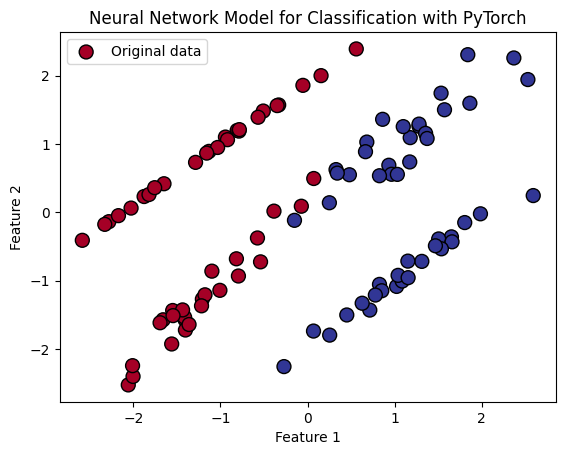

In [5]:
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', s=100, label='Original data')
plt.title('Neural Network Model for Classification with PyTorch')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Model with two hidden layers

In [6]:
# Define a neural network with two hidden layers
model_two_hidden_layers = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 2),
    nn.Softmax(dim=1)
)

# Model with three hidden layers

In [7]:
# Define a neural network with three hidden layers
model_three_hidden_layers = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 8),
    nn.ReLU(),
    nn.Linear(8, 5),
    nn.ReLU(),
    nn.Linear(5, 2),
    nn.Softmax(dim=1)
)

# Train the models

In [8]:
# Function to train a PyTorch model
def train_model(model, X, y, epochs=100, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    dataset = TensorDataset(X, y)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    for epoch in range(epochs):
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

In [9]:
# Train the model with two hidden layers
train_model(model_two_hidden_layers, X, y)
# Train the model with three hidden layers
train_model(model_three_hidden_layers, X, y)

# Plot the model architecture

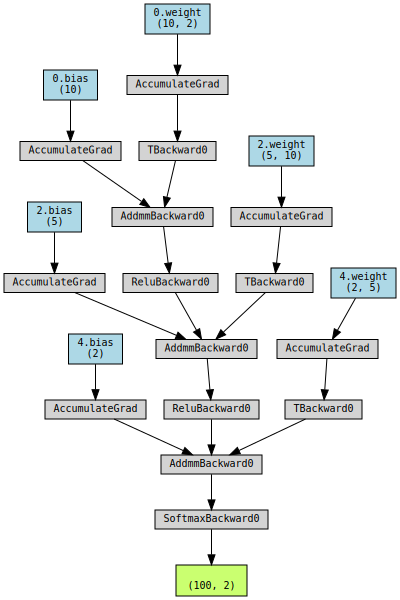

In [15]:
# Plot the model architecture Hidden layers =2
make_dot(model_two_hidden_layers(X), params=dict(model_two_hidden_layers.named_parameters()))

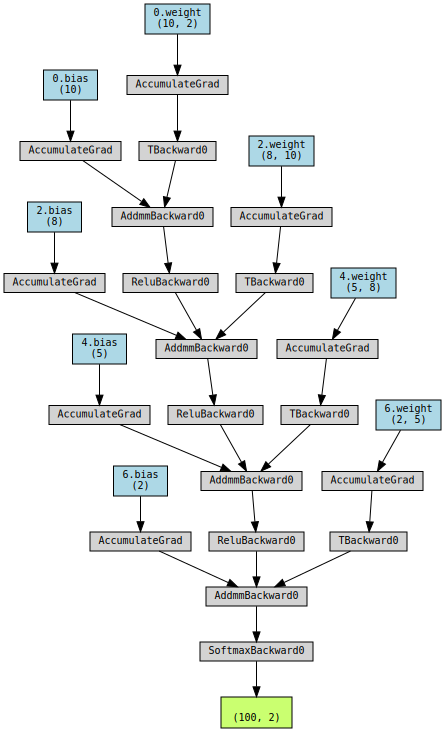

In [16]:
# Plot the model architecture Hidden layers =3
make_dot(model_three_hidden_layers(X), params=dict(model_three_hidden_layers.named_parameters()))

# Plot the results

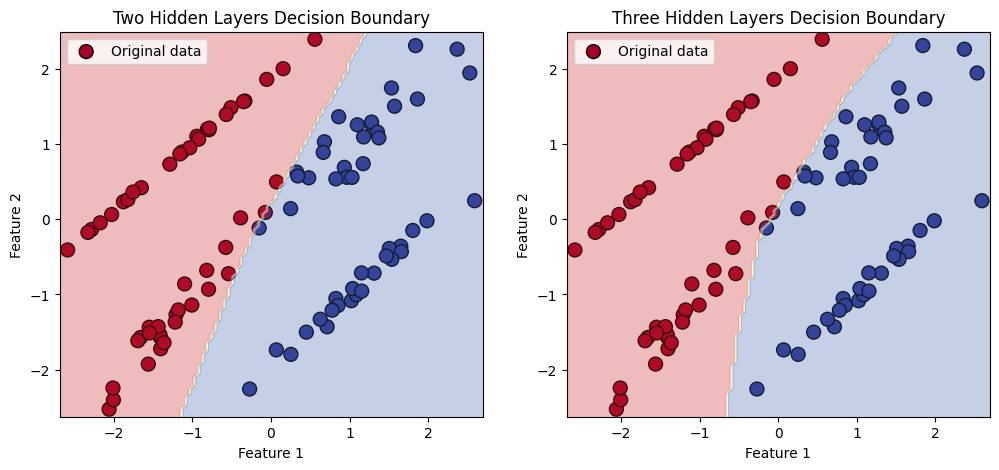

In [20]:
# Plot decision boundaries using subplot
plt.figure(figsize=(12, 5))

# Get the range of values for the meshgrid based on the actual data
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

# Plot decision boundaries for two hidden layers
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', s=100, label='Original data')
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
Z = model_two_hidden_layers(torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1))
Z = torch.argmax(Z, dim=1).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
plt.title('Two Hidden Layers Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot decision boundaries for three hidden layers
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', s=100, label='Original data')
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
Z = model_three_hidden_layers(torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1))
Z = torch.argmax(Z, dim=1).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
plt.title('Three Hidden Layers Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.show()